# WWW-UDEMY-DOWNLOADER

Originally created by Jansen Simanullang

June 2018
Medan, North Sumatera, Indonesia

## A. Requirements

### (1) Install Web Driver

These are your options:
- [Mozilla Firefox Geckodriver](https://github.com/mozilla/geckodriver/releases/)
- [Chrome Driver](http://chromedriver.chromium.org/downloads)

#### Check Webdriver Version

In [ ]:
!echo == GECKO DRIVER ==:
!geckodriver --version
!echo == CHROME DRIVER ==:
!chromedriver --version

### (2) Install Some Python Packages

In [2]:
!pip install -q selenium splinter 
!pip install -q --upgrade jupyter_contrib_nbextensions
!pip install -q --upgrade youtube-dl

In [3]:
from splinter import Browser
import os, shutil

### (3) Install Browser Extension: Cookies.txt

These are your options:

- [`Cookies.txt for Firefox Browser`](https://addons.mozilla.org/en-US/firefox/addon/cookies-txt/)
- [`Cookies.txt for Chrome Browser`](https://chrome.google.com/webstore/detail/cookiestxt/njabckikapfpffapmjgojcnbfjonfjfg)

The extension will be used to generate `cookies.txt` to validate your browsing activity. The server will sometimes detected that you are using an automated browsing activity and thus you have to open your browser and **prove that you are human** and regenerate the `cookies.txt` to validate your browsing activity.


## B. Definitions

### B. 1 Some Constants

In [4]:
homepage='https://www.udemy.com'

In [5]:
browser = Browser('firefox', headless = True)

In [6]:
cookie_file = 'cookies.txt'

In [7]:
initial_dirname = os.getcwd()

### B.2 Helper Functions

In [8]:
def screenshot():
    browser.driver.save_screenshot('screenshot.png')
    from PIL import Image
    return Image.open('screenshot.png')

In [9]:
import base64

credential_file = 'udemy.json'

def encode_cjson(text):
    return base64.b64encode(bytes(str(text), "utf-8"))

def save_cjson(text):
    text = encode_cjson(text)
    with open(credential_file,'wb+') as f:
        f.write(bytes(str(text),"utf-8"))
    f.close()

def read_cjson():
    import os
    if os.path.isfile(credential_file):
        with open(credential_file,'rb') as f:
            a = f.read()
        f.close()
    else:
        print('credential file not found')
    return str(a).split("'")[1]

def decode_cjson(text):
    return str(base64.b64decode(text)).split("'")[1]

def get_cjson():
    import json
    text = read_cjson()
    
    uid = json.loads(decode_cjson(text))
    return uid

def remove_cjson():
    import os
    if os.path.isfile(credential_file):
        os.remove(credential_file)

def get_credential():
    import getpass, os
    if os.path.isfile(credential_file):
        username = get_cjson()['user']
        password = get_cjson()['password']
    else:
        username = input('User Name:')
        password = getpass.getpass('Password:')
        text = '{"user":"'+username+'", "password":"'+password+'"}'
        save_cjson(text)
        
    return username, password

def remove_credential():
    remove_cjson()
    print('credential removed...')
    return

def reset_credential():
    remove_cjson()
    username, password = get_credential()
    return username, password

In [10]:
def download_from_udemy(playlist_start=1, **kvargs):
    
    download_dirname = course_titles[choice-1]
    try:
        os.mkdir(download_dirname)
    except:
        pass
    try:
        if os.path.isfile(cookie_file):
            os.remove(cookie_file)
            shutil.move(os.path.join(os.getcwd(), cookie_file), os.path.join(os.getcwd(), download_dirname), cookie_file)    
    except:
        pass

    os.chdir(download_dirname)
    download_command = 'youtube-dl --ignore-errors -o "%(playlist_index)s-%(title)s.%(ext)s" --cookies cookies.txt '+course_homepage
    if playlist_start:
        download_command += ' --playlist-start='+str(playlist_start) + ' --all-subs'
        
      
    print(download_command)
    print()
    downloader = open('downloader.sh','w')
    downloader.write(download_command)
    downloader.close()

    !chmod +x downloader.sh
    !./downloader.sh

    os.chdir(initial_dirname)

## C. Udemy
### Login Page

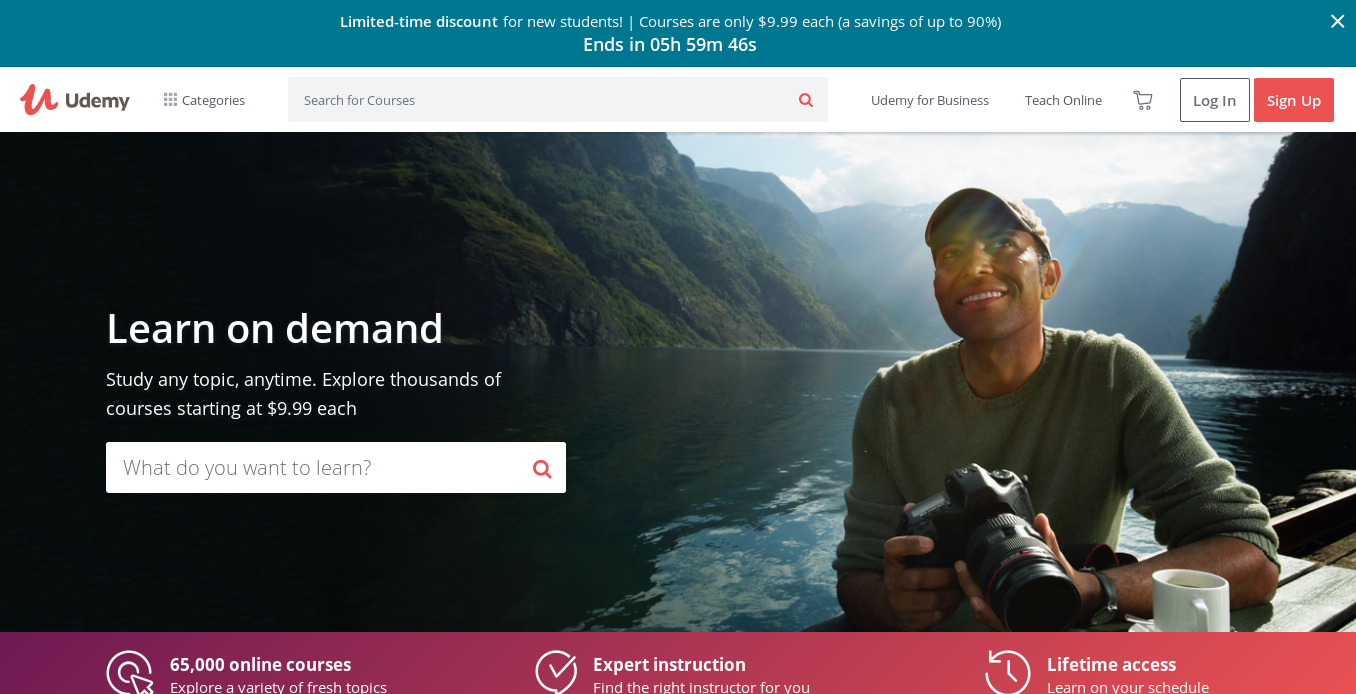

In [11]:
browser.visit('https://www.udemy.com/')
screenshot()

### Insert Login Credential

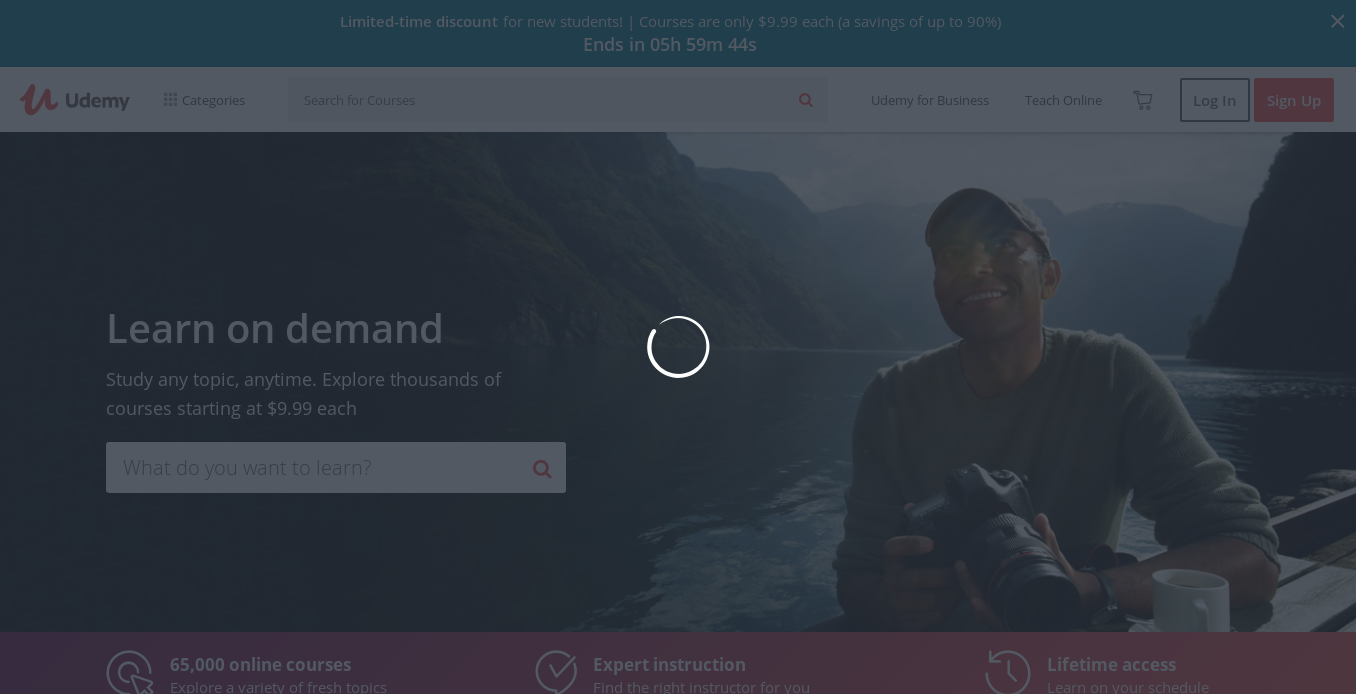

In [12]:
browser.find_by_text('Log In').click()
username, password = get_credential()
screenshot()

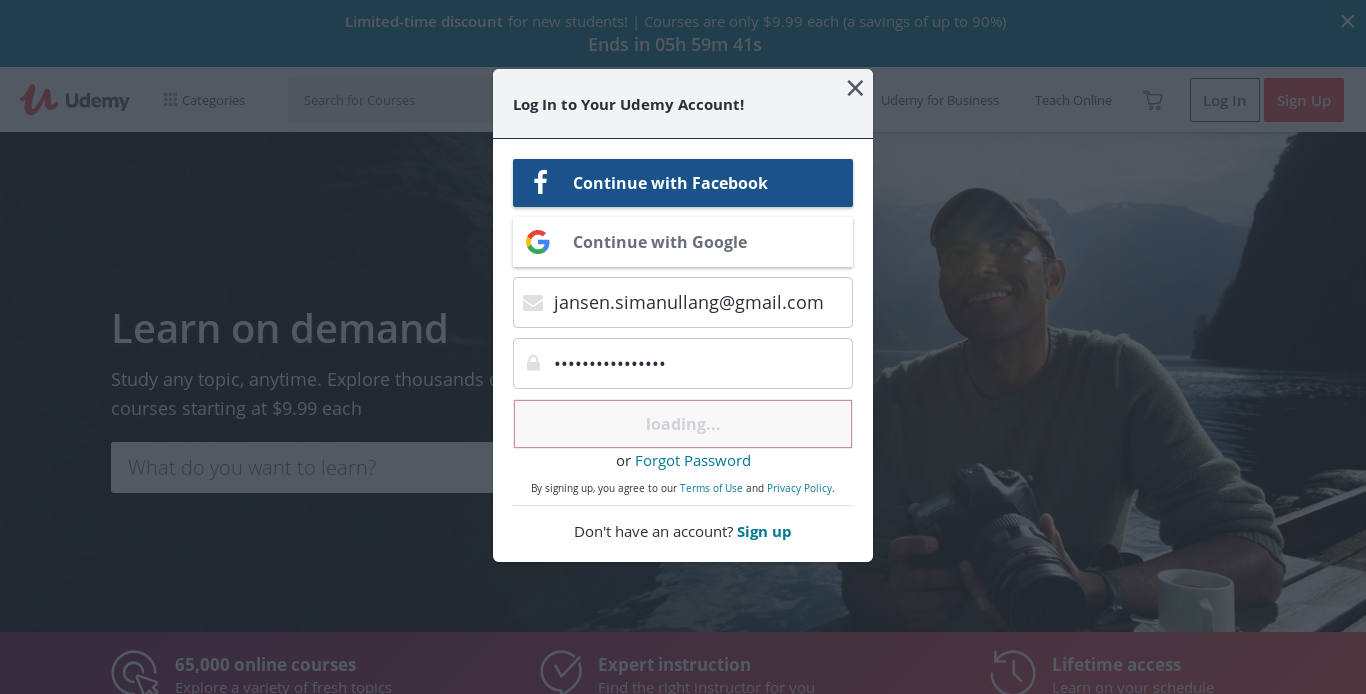

In [13]:
browser.fill('email', username)
browser.fill('password', password)
browser.find_by_name('submit').click()
screenshot()

### LIST COURSES

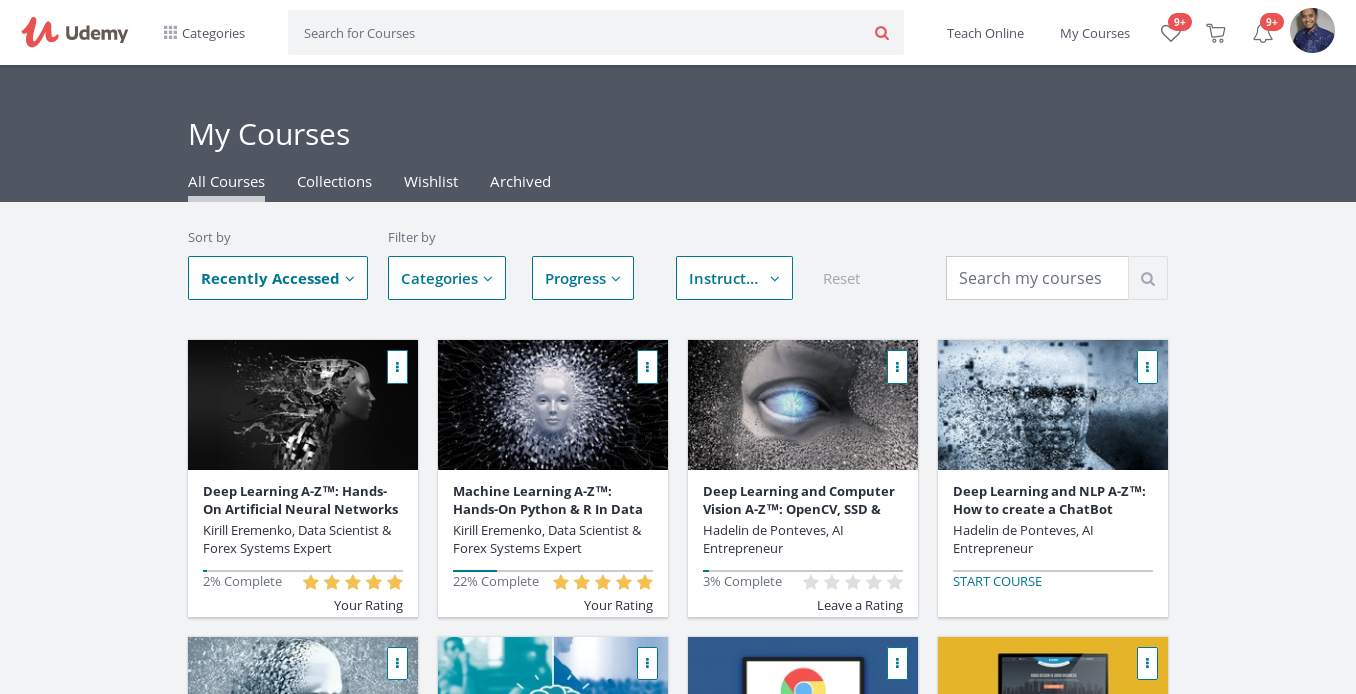

In [14]:
browser.visit('https://www.udemy.com/home/my-courses/learning/')
screenshot()

There are `{{i+1}}` courses visible in this page. Choose from number `1` to `{{i+1}}`.

## Input Choice Here

In [15]:
cards = browser.find_by_css('div.card')
course_urls = []
course_titles = []
for i, card in enumerate(cards):
    title = card.find_by_tag('strong')[0].text
    print(str(i+1)+') '+ title)
    course_titles.append(title)
    course_urls.append(card.find_by_tag('a')['href'])

1) Deep Learning A-Z™: Hands-On Artificial Neural Networks
2) Machine Learning A-Z™: Hands-On Python & R In Data Science
3) Deep Learning and Computer Vision A-Z™: OpenCV, SSD & GANs
4) Deep Learning and NLP A-Z™: How to create a ChatBot
5) Artificial Intelligence A-Z™: Learn How To Build An AI
6) Critical Thinking and Politics
7) Mastering the Google Chrome Developer Tools
8) Build A Responsive Website From Scratch
9) Trademarks in Plain English. Trademark Law for startups.
10) Hadoop Big Data - Must See Introduction to Big Data
11) Big Data and Hadoop Essentials
12) Learn 30 New Things In 30 Days!


In [31]:
try:
    choice = int(input('Choose a course number from [1] to ['+ str(i+1)+']:\n'))
except:
    choice = 1
course_title = course_titles[choice-1]
print('>> You choose:\n'+course_title)

Choose a course number from [1] to [12]:
5
>> You choose:
Artificial Intelligence A-Z™: Learn How To Build An AI


## COURSE: {{course_titles[choice-1]}}

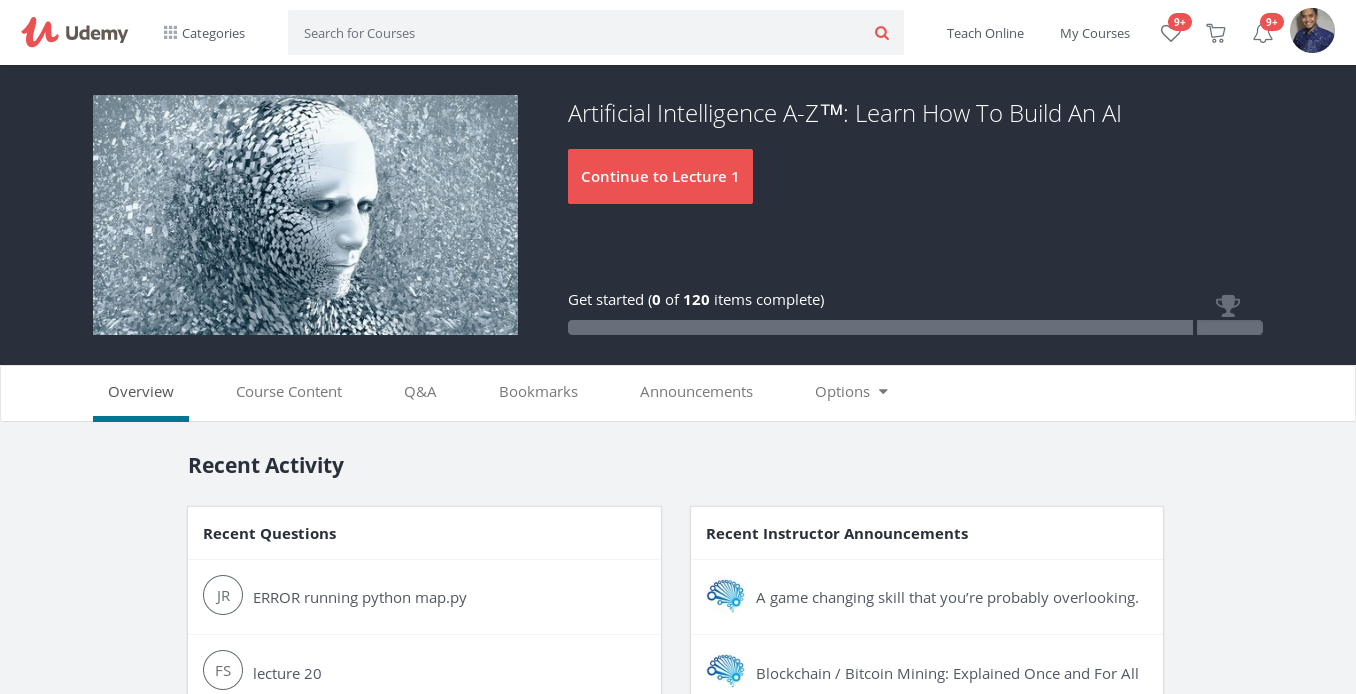

In [17]:
browser.visit(course_urls[choice-1])
course_homepage = browser.driver.current_url
course_homepage = homepage +'/' +course_homepage.split('/')[3]+'/learn'
browser.visit(course_homepage)
screenshot()

### Downloading with `youtube-dl` and cookies.txt

In [ ]:
%%bash -s "$cookie_file" "$course_title"
./cookiefire > $1
echo please generate cookies.txt with your browser extension
echo and overwrite the existing cookies.txt
echo 
echo put the generated cookies.txt in the following directory:
echo ./$2/

In [ ]:
download_from_udemy(playlist_start=1)

youtube-dl --ignore-errors -o "%(playlist_index)s-%(title)s.%(ext)s" --cookies cookies.txt https://www.udemy.com/artificial-intelligence-az/learn --playlist-start=1 --all-subs

[udemy:course] artificial-intelligence-az: Downloading webpage
[udemy:course] 1219332: Downloading course curriculum
[download] Downloading playlist: Artificial Intelligence A-Z™: Learn How To Build An AI
[udemy:course] playlist Artificial Intelligence A-Z™: Learn How To Build An AI: Collected 103 video ids (downloading 103 of them)
[download] Downloading video 1 of 103
[udemy] 8829144: Downloading webpage
[udemy] 8829144: Downloading lecture JSON
[download] Destination: 001-Why AI.mp4
[download] 100% of 12.57MiB in 00:24.05KiB/s ETA 00:00nown ETA
[download] Downloading video 2 of 103
[udemy] 7091812: Downloading webpage
[udemy] 7091812: Downloading lecture JSON
[download] Destination: 002-Introduction.mp4
[download] 100% of 8.79MiB in 00:15.82KiB/s ETA 00:0014
[download] Downloading video 3 of 103
[udemy] 72287

### ATTENTION:
In case you got 

`HTTP Error 403: Unauthorized (caused by <HTTPError 403: 'Unauthorized'>);`

or 

`ERROR: Course xxxxxx is not free. You have to pay for it before you can download. Use this URL to confirm purchase: https://www.udemy.com/cart/checkout/express/course/xxxxxx/?discountCode=ddddddddddddd`


```
```
  - That means: **THE COOKIE IS EXPIRED or THE SERVER DETECTED YOUR AUTOMATED BEHAVIOR**
```
```
  - **open Firefox browser**
      - make some activities by clicking one of the videos you wish to download
      - this will regenerate the cookies
      - **do not close your browser while downloading**
      - please check the verification message when it shows up: 
          - **`Verify that you are human!`, **
          -  click the check box and finish the CAPTCHA questions if any
          ![](verify.png)
```
```
  - **regenerate and export cookies to file: cookies.txt** using `Cookies.txt` Browser Extensions:
      - [`Cookies.txt for Firefox Browser`](https://addons.mozilla.org/en-US/firefox/addon/cookies-txt/)
      - [`Cookies.txt for Chrome Browser`](https://chrome.google.com/webstore/detail/cookiestxt/njabckikapfpffapmjgojcnbfjonfjfg)

```
```
  - **repeat the `download_from_udemy(playlist_start)` **
      - where `playlist-start`= `your_last_video_squence`, 
      - for example when you want to download 261 videos but interrupted at 188 then you can set `playlist-start=188`

### Close browser

In [20]:
browser.quit()

### check if there is still process running

In [21]:
!ps -aux | grep youtube-dl

bri      30852  0.0  0.0   4504   704 pts/2    Ss+  11:44   0:00 /bin/sh -c ps -aux | grep youtube-dl
bri      30854  0.0  0.0  14228   964 pts/2    S+   11:44   0:00 grep youtube-dl
